In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,...,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,...,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


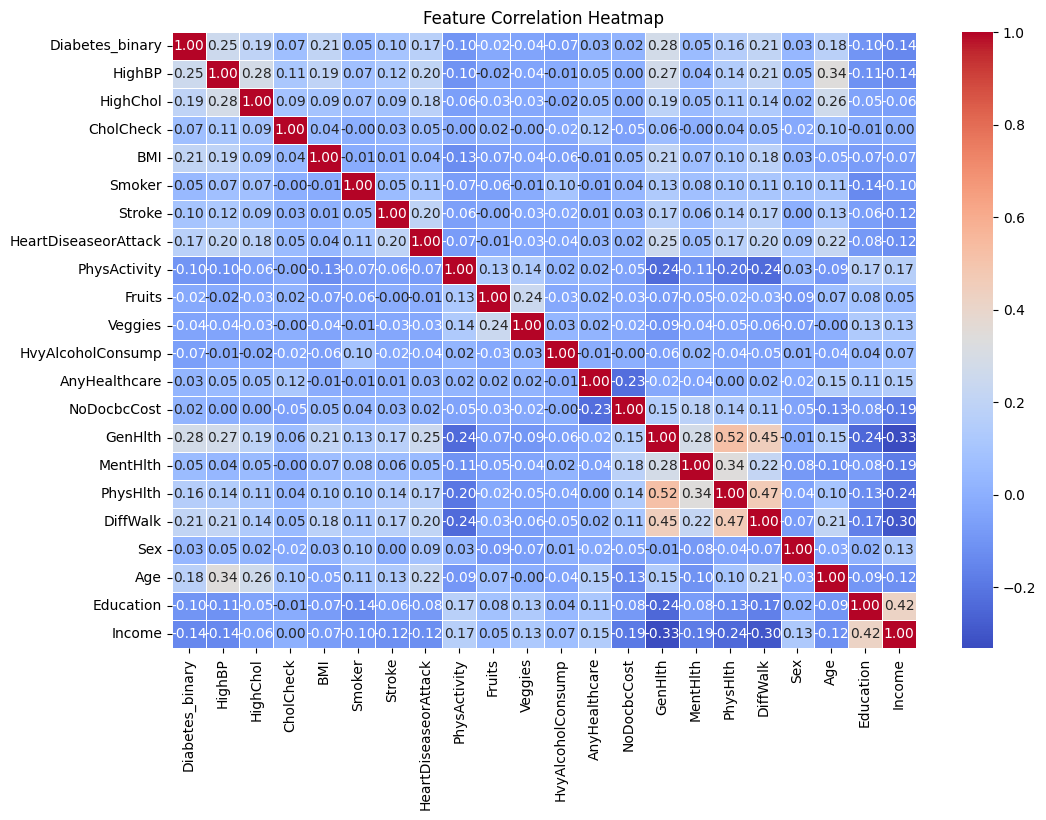

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# High Correlated with heart disease or attack:
*   highbp(0.20)
*   Diabetes(0.17)
*   highcol (0.18)
*   smoker (0.11) **only**
*   stroke (.20)
*   **highest**:gen health  (0.25)
*   age (0.22)
*  diffwalk (0.20)
*   phyhealth (0. 17 )
*   income (-0.12) **only negative corr **


In [ ]:
selected_features = ["HighBP", "Diabetes_binary", "HighChol", "Stroke",
                     "GenHlth", "Age", "DiffWalk", "PhysHlth", "HeartDiseaseorAttack","Smoker","Income"]
df_selected = df[selected_features]
data=df_selected
data.head()


,HighBP,Diabetes_binary,HighChol,Stroke,GenHlth,Age,DiffWalk,PhysHlth,HeartDiseaseorAttack,Smoker,Income
0,1.0,0.0,1.0,0.0,5.0,9.0,1.0,15.0,0.0,1.0,3.0
1,0.0,0.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,5.0,9.0,1.0,30.0,0.0,0.0,8.0
3,1.0,0.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,6.0
4,1.0,0.0,1.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (183579, 10)
X_test shape: (45895, 10)
y_train shape: (183579,)
y_test shape: (45895,)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("X_train_resampled shape:", X_resampled.shape)
print("y_train_resampled shape:", y_resampled.shape)


X_train_resampled shape: (411522, 10)
y_train_resampled shape: (411522,)


In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test_resampled shape:", X_test_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("y_test_resampled shape:", y_test_resampled.shape)

X_train_resampled shape: (329217, 10)
X_test_resampled shape: (82305, 10)
y_train_resampled shape: (329217,)
y_test_resampled shape: (82305,)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_child_weight': [1, 3],
    'colsample_bytree': [0.7, 1.0],
    'learning_rate': [0.1, 0.3]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_xgb = grid_search.best_estimator_
test_score = best_xgb.score(X_test_resampled, y_test_resampled)
print("Test set score:", test_score)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 100}
Best cross-validation score: 0.8717229138006634
Test set score: 0.8729117307575481
